# Introduction to Deep Learning
---
#### Course Official Website [MIT 2021](http://introtodeeplearning.com/)
 Presented by: **Alexander Amini** and **Ava Soleimany**




This is a two weeks Bootcamp for MIT students but also accessible to the public after the two weeks. What is amazing about this course is, the instructors assumed that anyone attending this lecture is a complete beginner thus they start by explaining the concepts of Deep Learning from the ground-top. When I say from the ground-top I mean from understanding what is a perceptron, to developing a complete state-of-the-art deep neural network.

**[See the official slides](http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L1.pdf)**



## What is Deep Learning?

Deep Learning is a subset of Machine Learning that leverages neural networks to automatically extracts useful patterns and/or features from raw data, then use those features to learn to perform a task. 

Unlike machine learning where you are required to perform some form of data or feature engineering for greater outcomes, deep learning focuses on how to learned these features directly from raw data in a hierarchical manner without having the need to handcraft these features.


You may be wondering if deep learning has these capabilities, why have we not take advantage of it long since? 
This is a genuine question. The fact is neural networks have been in existence  for decades, however, there were no suitable drivers. Therefore, it is fair to say the resurgence of deep learning is as a result of the following:-
- The accessibility of bid data
- Advance in computer hardware such as GPUs
- Availability of improved software libraries and/or tools such as tensorflow, pygeometric, etc. 




According to the course presenter, completing this course will empower you with both the technical and practical know-how to use deep learning methods to accomplish a task.

## What is a Perceptron?

A perceptron is the building block of deep learning. A neural network constitutes a group of perceptrons. 




$$  \hat{y} = g \left(w_0 + \sum_{i=1}^m  x_i w_i \right) $$
where : $$ w_0 = \text{Bias}$$ $$ \hat{y} = Output $$ $$ g = \text{Non-linear activation fucntion} $$   $$ \left(\sum_{i=1}^m  x_i w_i \right) =  \text{sum of input vectors and their corssponding  weights}$$


There are numerous activation function. The choice of activation function is determine by the task at hand. Note the choosing the right activation function has a great influence on the outcome of the model therefore, it requires investing time to figure out which activation function best suits your problem. 

*Bellow are three commonly used activation functions implemented in python*.







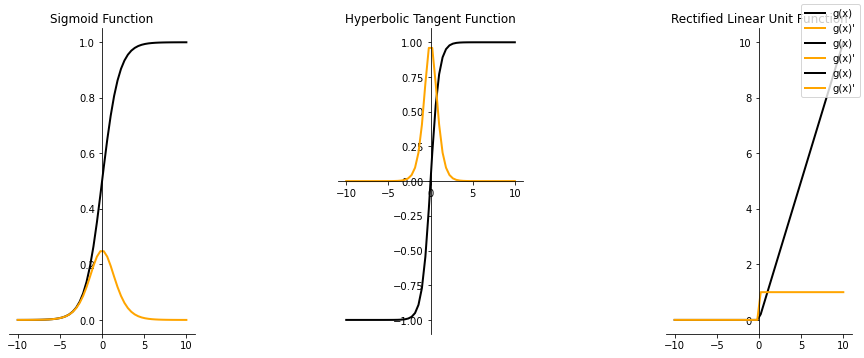

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(-10,10)
sig = 1/(1+np.exp(-x)) #sigmoid function
sig_prime = sig*(1-sig) # derivative of the sigmoid function
hyper_tan = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x)) # hyperbolic tagent function
hyper_tan_prime = 1-(hyper_tan**2) # derivative of the hyperbolic tagent function
reLu = np.maximum(0,x) #Rectified linear unit function
reLu_prime = (x >0)*1 # derivative of the rectified linear unit function

fig = plt.figure(figsize=(12,5))



ax = fig.add_subplot(1, 3, 1)
fig.tight_layout(w_pad=2)
ax.set_title('Sigmoid Function')
ax.plot(x,sig, linewidth = 2, color = 'black', label = 'g(x)')
ax.plot(x,sig_prime, linewidth = 2, color = 'orange', label = "g(x)'")
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')



ax = fig.add_subplot(1, 3, 2)
fig.tight_layout(w_pad=12)
ax.set_title('Hyperbolic Tangent Function')
ax.plot(x,hyper_tan, linewidth = 2, color = 'black', label = 'g(x)')
ax.plot(x,hyper_tan_prime, linewidth = 2, color = 'orange', label = "g(x)'")
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


ax = fig.add_subplot(1, 3, 3)
ax.set_title('Rectified Linear Unit Function')
Relu = ax.plot(x,reLu, linewidth = 2, color = 'black', label = "g(x)")
Relu_prime = ax.plot(x,reLu_prime, linewidth = 2, color = 'orange', label = "g(x)'")
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


fig.show()

### Why do we need an activation function?

The most simple and straightforward answer is to introduce non-linearity. 
For example, it is not always the case that problems are easily separable by a simple straight line. ***See the figures in the official slides!***

What if you were asked to build a neural network that separate two classes of data points?

You can see that it is practically impossible to separate the classes with a single straight line. Just because the example below is dummy doesn't necessarily mean that you will not encounter similar problems in real-world datasets. In fact, real-world datasets are way more complex than the given dummy example. Therefore, we use activation function to introduce non-linearity in our neural network solutions. 

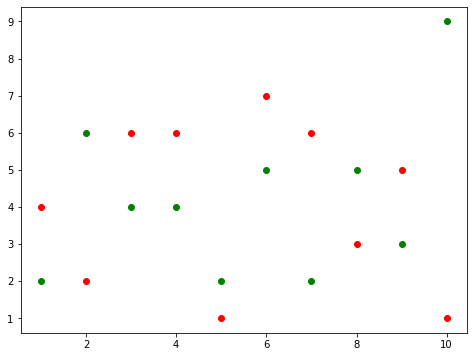

In [12]:
import matplotlib.pyplot as plt


x = [1,2,3,4,5,6,7,8,9,10]
y_1 = [4,2,6,6,1,7,6,3,5,1]
y_2 = [2,6,4,4,2,5,2,5,3,9]

plt.figure(figsize=(8,6))
plt.scatter(x,y_1, c='red' )
plt.scatter(x,y_2, c='green')

plt.show()

### Example of a perceptron

Given the follow: $$
w_0 = 1 \text{ and } W = \begin{bmatrix} 1 \\
-2 \end{bmatrix}$$

$$
\hat{y} = g\left( w_0 + X^TW\right) 
$$

$$
= g\left( 1 + \begin{bmatrix} x_1\\ x_2\end{bmatrix}^T\begin{bmatrix} 3\\ -2\end{bmatrix}\right) 
$$

$$
\hat{y} = g\left( 1 + 3x_1- 2x_2\right) 
$$

$\text{Assume the input} X = \begin{bmatrix} -1\\ 2\end{bmatrix} $

$$
\hat{y} = g\left( 1 + (3*-1)- (2*2)\right) 
$$

$$= g\left( -6\right) \approx 0.002$$






Please take note of the follow:
$$ X^TW = \sum_{i=1}^m  x_i w_i$$

- The summation above is a matrix dot product. If you need a walkthrough or a detailed explanation of a dot product [see this link](www.link.com)
- We are able to do the above calculation because there were only two inputs but in a real-world problem, the step-by-step calculation above is impossible. 




## Building Nueral Networks With Perceptron

Before dive deep into the neural network world, it's important to always important the various procedures or steps involve in the execution of neural networks. They are;
- **Take a dot-product of all the inputs and their corresponding weights**.
- **Add bias to the result obtained from the dot-product**.
- **Apply a non-linearity function to your result and then get your final output or result**.

*It is that simple right?* Well, that's just the high-level procedure. Actually, it is more complex than you might think. Each and every step mentioned above has a number of **considerations** and/or **tweaks**. Yes, there are tweaks and that's where the difference in the performance of our models lies.

### Multi Output Perceptron

Earlier our example was a single perceptron, but that was just to give you a baseline or foundational understanding of the concept of **neural networks**. In reality, a **deep learning** architecture or model is a stack of **Dense Layers**. This is, inputs are densely connected to each neuron of dense layer/s. Now let's see how we mathematically represents dense layer. **[For a visual illustration, see the official slides](http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L1.pdf)**


$$  z_i = \left(w_{0,i} + \sum_{j=1}^m  x_j w_{j,i} \right) $$

***It has been too much theory and mathematic formulas right? Well, that was quite useful to build up your understanding of neural networks. Enough of the words now let's take a look at how to implement a dense layer from scratch using tensorflow***. 


```
#import tensorflow as tf
#import keras
#class MyDenseLayer(tf.keras.layers.Layer):
#   def __init__(self, input_dim, output_dim):
#      super(MyDenseLayer, self).__init__()
#
#      self.W = self.add_weight([input_dim, output_dim])
#      self.b = self.add_weight([1, output_dim])
#
#   def call(self,inputs):
#      z = tf.matmul(input, self.W) + self.b 
#      output = tf.math.sigmoid(z)
#
#      return output
```         

In [3]:
import tensorflow as tf
from tensorflow import keras
class MyDenseLayer(tf.keras.layers.Layer):
   def __init__(self, input_dim, output_dim):
      super(MyDenseLayer, self).__init__()

      self.W = self.add_weight([input_dim, output_dim])
      self.b = self.add_weight([1, output_dim])

   def call(self,inputs):
      z = tf.matmul(input, self.W) + self.b 
      output = tf.math.sigmoid(z)

      return output

ModuleNotFoundError: No module named 'tensorflow'

I guess you might be wondering how come thousands of words became 11 lines of code? 

Well, yes this is how easy it is. In fact, it is much easier by using the tesorflow implementation to avoid building layers from scratch.
```
import tensorflow as tf

Layer = tf.keras.layers.Dense(units=2)
```
Actually, if you could recall in the beginning, we did mention  the drivers or motivation for deep learning. One of them was the availability of rich software libraries and tools. Tensorflow, Kera, PyTorch, etc are among these amazing tools or packages. 

In the code above, `tf.keras.layers.Layer` is a class from which all layers inherit. This is a class implementing common neural network operations such as convolution etc. that requires managing weights, losses, updates, and inter-layer connectivity. For detail information about `tf.keras.layers.Layer` class see the documentation [for version 2.x](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) and [for version 1.x](https://docs.w3cub.com/tensorflow~1.15/keras/layers/layer.html).



## Single Layer Neural Network

Now that we have understood what perceptron and dense layers are, let's combine this together to create our first single-layer neural network. 

It has four parts or sections if you wish, an input layer, dense layer, hidden layer, and final output. If you have been following for the first time you might be a bit lost at this point. But it's okay if you are! However, just stay still while I break it down into digestible pieces. 

Earlier, we said for a perceptron, the final output is determined as follow:
$$  \hat{y} = g \left(w_0 + \sum_{i=1}^m  x_i w_i \right) $$

and then we said the sum of the inputs and their corresponding weights is as follow:
$$ \left(\sum_{i=1}^m  x_i w_i \right) $$ or $$ X^TW $$

and lately we said a multi-output dense layer is is follow:
$$  z_i = \left(w_{0,i} + \sum_{j=1}^m  x_j w_{j,i} \right) $$ 
but in all the above expressions we have not mentioned the hidden layers. Thus, these were incomplete deep neural network architectures.  First let's see a representation of a hidden layer for a single layer neural network.

$$  z_i =\underbrace{ \left(w_{0,i}^{(1)} + \sum_{j=1}^m  x_j w_{j,i}^{(1)} \right)}_\text{first dense layer} $$ 

For a complete deep neural network, we must account for the hidden layer/s. This can be express as follow:

$$  \hat{y} = g\underbrace{ \left(w_{0,i}^{(2)} + \sum_{i=1}^{d_i} \overbrace{ {g(z_j)}}^\text{hidden layer} w_{j,i}^{(2)} \right)}_\text{second dense layer} $$

Alright! by now it's a little be clear. If not just spend a little time and breakdown these equations further to a level you are able to understand.

In a nutshell, the final output is determined by the summation of hidden layer/s and their associated weights plus the bias then pass it into a non-linear activation function. 

For example, lets take look at the computation of one neuron in the hidden layer:

$$  z_2 = \left(w_{0,2}^{(1)} + \sum_{j=1}^m  x_j w_{j,2} \right) $$ 
$$  z_2 = w_{0,i}^{(1)} + x_1 w_{1,2}^{(1)} + x_2 w_{2,2}^{(1)} + \ldots  + x_{m} w_{m,2}^{(1)} $$ 


## Deep Neural Network
A deep neural network is a stack of dense or hidden layers. The dept of a neural network is determined by its dense layers. Therefore, in general, the value of neuron in a deep neural network is determined as follow:

$$  z_{k,i} = w_{0,i}^{(k)} + \sum_{j=1}^{n_{k-1}}  g(z_{k-1,j}) w_{j,i}^{(k)}  $$ 

and to implement this in tensorflow:
```
import tensorflow as tf

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(n1),
   # tf.keras.layers.Dense(n2),
   tf.keras.layers.Dense(2)
  ])
 #The codes i commented above is just 
 #showing you that you can stack a number of dense layers 
 #that you want and 
 #pass in the number of neurons for each hidden layer.
```

See the documentation of `#tf.keras.Sequential` [here](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).

## Applying Neural Networks

#### Example Problem

Will I pass this class/ course ?
Given the following;

$x_1 = 4=\text{Number of lectures you attend}$
$x_2 = 5 =\text{Hours spent on the final project}$

Computing this will be quite an easy task right? given that we know our inputs and how to find $\hat{y}$. 
- image

Okay, let's assume that you have seen similar data (*number of lectures attend and amount of time spent on final project*) for students in the previous class.

#### sample data
Student that pass the previous class:

$x_1 = [3,4,5,6,7,9,11,11,12] $
$x_2 = [8,5,3,7,6,5,2,5,3] $

Student that fail the previous class:

$x_1 = [1,1,3] $
$x_2 = [1,3,2] $


<function matplotlib.pyplot.show(close=None, block=None)>

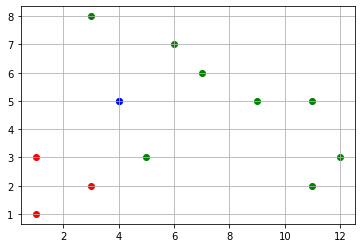

In [14]:
import matplotlib.pyplot as plt

Px1= [3,4,5,6,7,9,11,11,12] # number lectures attended by student who pass

Px2= [8,5,3,7,6,5,2,5,3] # number of hours spent in final project by wstudent who pass

Fx1 =[1,1,3] # number lectures attended by student who fail
Fx2 =[1,3,2] # number of hours spent in final project by wstudent who fail

Yx1 = [4] #number of lectures you've attended
Yx2 = [5] #number of hours you've spent on your final project
plt.scatter(Px1,Px2, c='Green')
plt.scatter(Fx1,Fx2, c='Red')
plt.scatter(Yx1,Yx2, c='Blue')
plt.grid()
plt.show

Now let's say you saw this data and plot it against your score as above. Look at the scatter plot, your chances of passing this class are very high. However, you decided to compute the probability of you passing the class using a neural network. And your results show that your chances of passing the class is 10%. 

That sounds strange, right?

With all the hype surrounding **deep neural networks**, it's not able to accurately predict your chances of passing a class given only two inputs. Well, before you doubt the model, ask yourself if the previous class data is removed from the scatter plot above, how will determine your chances of passing?

I hope answering this question will help you to understand why it was said earlier that access to **big data** is a key driving factor for the resurgence of deep learning. Without data, you can't train your model and without training a model, there is nothing a deep neural network can do for you.

#### Quantifying Loss
The quality of our neural network model is determined by the loss function. 

$$L \left(\underbrace{f(x^{(i)}; W)}_\text{Predicted}, \underbrace{y^{(1)}}_\text{Actual}\right)$$

***Note: The more the predicted value is closer to the actual value, the more accurate our model and vice versa***.

#### Empirical Loss
Earlier we've seen a loss function, well that was for calculating the loss of predicting the score of a single student as in our example above. Therefore, if we want to know how well our model will perform, we use the **empirical loss** or also refer to as the **mean-error**. 


$$J(W) = \frac1n \sum_{(i=1)}^n L (\underbrace{f(x^{(i)}; W)}_\text{Predicted}, \underbrace{y^{(1)}}_\text{Actual})$$

#### Binary Cross Entropy Loss
As the name implies, "binary" meaning two, **binary cross-entropy loss** can be used to determine the performance of binary classification models.


$$J(W) = - \frac1n \sum_{(i=1)}^n \underbrace{y^{(1)}}_\text{Actual} log (\underbrace{f(x^{(i)}; W)}_\text{Predicted} + (1 - \underbrace{y^{(1)}}_\text{Actual}) log( 1 - \underbrace{f(x^{(i)}; W)}_\text{Predicted}))$$

***Oh!, hold on! wait a moment how am I suppose to know all these equation or formulas***? 

Well, you are required to understand how this equation works behind the scene but you are not required to know them by head(*I mean memorize*). In fact, you might not even implementing such equations from scratch. Really? YES! see below for  the implemtation using tensorflow;

```
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, predicted))
```

#### Mean Squared Error Loss

In the case of a regression problem, you can use mean square error loss to determine how accurate your model is.

$$J(W) = \frac1n \sum_{(i=1)}^n ( \underbrace{y^{(1)}}_\text{Actual} - \underbrace{f(x^{(i)}; W)}_\text{Predicted} )^2$$

## Training Neural Networks

The essence of training a neural network is to minimize the loss function, in other words, refers to loss optimization. 

$$W^{*} =\underset{W}{argmin}\frac1n \sum_{(i=1)}^n L (\underbrace{f(x^{(i)}; W)}_\text{Predicted}, \underbrace{y^{(1)}}_\text{Actual})$$

or 

$$W^{*} =\underset{W}{argmin} J(W) \text{ where } W = [W^{(0)}, W^{(1)}, \ldots]$$


***Here $J(W)$ refers to the empirical loss and $W$ is referring to all the weights for each layer***. 


The objective of training a neural network is to find the lowest point in the **loss landscape** that will produce the optimal weight for our network.

So how do we find the lowest point in the landscape above? It can be found by computing the **gradient** of the landscape at a given or chosen point. This will tell us the highest or steepest ascent. 

$$\text{gradient } = \frac{\partial J(W)}{\partial W}$$

***For example, pick a random point on the landscape and compute its gradient. Now instead of going up, we want to go to the lowest point. Therefore, if the direction is upwards, we take the negative of the gradient and step downwards. At each step, we compute the gradient and move downwards. This is repeated until we converge at a local minimum (it could be a global minimum as well)***.  

#### Gradient Descent Algorithm 
1. *Initialize random weights $\approx N(0,\sigma ^2)$*
2. *Loop until convergence:*
    1. *Compute gradient, $\frac{\partial J(W)}{\partial W}$*
    2. *Update weights, $W \gets W - \eta \frac{\partial J(W)}{\partial W}$*
3. *Return weights*

#### Gradient Descent in tensorflow

```
import tensorflow as tf

weights = tf.Variable([tf.random.normal()])

while True:
   with tf.GradientTape() as g:
      loss = compute_loss(weights)
      gradient = g.gradient(loss,weights)
   weights = weights - lr + gradient
```

***Note: In the code above, lr (also denoted as $\eta$ in the algorithm above)refers to the learning rate. And it is if not the most important parameter of your model***. 

#### Backpropagation
Inside the loop where the gradient descent is computed in the algorithm above, is a process called **Backpropagation**.  The backpropagation tells us how does a change in the weights (derivative of the gradient in respect to weight) affects the final loss i.e. $J(W)$?


*For example, given a simple neural network with two weights (as in the figure above) how do we determine the derivative of $w_2$? This can be done using the [chain rule](https://www.calculushowto.com/derivatives/chain-rule-examples/)* 

$\frac{\partial J(W)}{\partial W_2} =\frac{\partial J(W)}{\partial \hat {y}} * \frac{\partial \hat {y}}{\partial W_2}$

How abour $w_1$?

$\frac{\partial J(W)}{\partial W_1} =\frac{\partial J(W)}{\partial \hat {y}} * \frac{\partial \hat {y}}{\partial z_1}*\frac{\partial  z_1}{\partial W_1}$

So you see that we are stating from the loss all the way (recursively) to the first layer of weights.


## Neural Networks in Practice
#### Optimization 

In practice, you will never come across a neural network as simple as two or so neurons. Finding the optimal weights can be very challenging. Therefore, computing the gradient descent or backpropagation is actually very **computationally expensive or intensive** (let's say you thousand, millions, or even billions of weights).  Another problem associated with computing the gradient descent is the loss can be non-covex, thus your algorithm can easily get stuck at local minimum as a result producing undesirable results. 

#### Learning Rate

Recall the equation bellow;

$$ W \gets W - \eta \frac{\partial J(W)}{\partial W}$$

The learning rate ($\eta$) is a small but extremely important factor that determines the step size (magnitude) of our gradient descent.

When determining a learning rate, it's important to take note of the following;
- If you take very small baby steps, your model can get stock at the local minimum.
- Likewise, if your step size are too large, you might end up skipping the global minimum. 

**Therefore, the challenge is how do we determine suitable learning rates that are large enough to avoid getting stuck at local minimum but small enough to avoid diverging from the global minimum**.

How do we choose or optimize our learning rate?

Well, there are no theoretically proven methods regarded as the most optimal. However, due to its importance in training a model, there has been extensive research about this topic. 

One commonly used method is as simple as trying as many learning rates as you can, if you are fortunate enough so be it [this video might be helpful](https://youtu.be/bR7z2MA0p-o). 

Another method of find =ing an optimal learning rate is called *Adaptive Learning Rates* [read more from this article](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1) or [this](https://www.sciencedirect.com/topics/computer-science/adaptive-learning-rate).

Also most of these [optimizers](https://www.tensorflow.org/addons/api_docs/python/tfa/optimizers) have been implemented in [tensorflow](https://www.tensorflow.org/addons/api_docs/python/tfa/optimizers).


### Putting it All Together in tensorflow

```
import tensorflow as tf

model = tf.keras.Sequential([
 here you determine your dense layers
])

optimizer = tf.keras.optimizer.SGD()

while True:
    prediction = model(x)
    with tf.GradientTape() as tape:
        loss = compute_loss(y, prediction)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variable))
```

#### Mini-batches 
In the gradient descent algorithm above, we've been told that each data point must be computed before the algorithm is completed. Imagine having millions of data points! Therefore this computation is most of the times not feasible. Thus, the concept of batching, in this case, refer to as **Stochastic Gradient Descent**. Instead of computing all the data points, we choose a single data point compute it and update weights based on the selected data point. This has the advantage of being very fast, but it has the disadvantage of being too noisy. Therefore, to regularize the noise, instead of picking a single data point, we will choose a batch of data points.

#### Stochastic Gradient Descent Algorithm 

#### For a Single Data Point
1. *Initialize random weights $\approx N(0,\sigma ^2)$*
2. *Loop until convergence:*
    1. *Pick single data point $i$*
    1. *Compute gradient, $\frac{\partial J_i(W)}{\partial W}$*
    2. *Update weights, $W \gets W - \eta \frac{\partial J(W)}{\partial W}$*
3. *Return weights*


#### For a Batch Data Points
1. *Initialize random weights $\approx N(0,\sigma ^2)$*
2. *Loop until convergence:*
    1. *Pick batch of $B$ data points* 
    1. *Compute gradient, $\frac{\partial J(W)}{\partial W} = \frac1B \sum_{k=1}^B\frac{\partial J_k(W)}{\partial W}$*
    2. *Update weights, $W \gets W - \eta \frac{\partial J(W)}{\partial W}$*
3. *Return weights*

#### Advantages of Mini-Batch Training
- More acurate estimation of gradient
- Smoother convergence
- Allows for larger learning rates
- Parallelizabl computing with GPUs


#### OverFitting
Overfitting is one of the most fundamental problems in the machine/deep learning field. It is also referred to as the problem of generalization. A good model is a model that doesn't **underfit** (the model does not have the capacity to fully learn the data) and doesn't **overfit** (model is too complex to the extent it does not generalize well), instead, a good model should be an **ideal fit** (a model that can generalize in case it comes across a new set of related data). 

- image fitting problem

The test data help us to evaluate how good our model is. Therefore, during training, we should not, in any case, introduce the test data to our model until at the last and final step. Thus, the idea of a **train-validate-test** arisen. 

#### Regularization
In order to avoid overfitting our model, certain strategies are introduced during the training process. Among these methods is *regularization*.

Regularization is a technique that constrains our optimization problem to discourage complex models. At the same time, improve the generalization of our model when it encouter new data. There are various form of regularization among them are;

####  Dropout 
To randomly set some activations to 0 during training. This is done by dropping some  of the activation nodes in the hidden layer. This will force the network not to depend on an individual done.

#### Early Stopping
This the process of stopping the training process before we have the chance of overfitting our model.

To learn more about regularization, check this video by [Andrew Ng](https://youtu.be/6g0t3Phly2M). 



**Note I created is page for my own learning purpose and case someone else prefer reading than watching videos. For more visual illustrations see the [official slides](http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L1.pdf) **